<a href="https://colab.research.google.com/github/HarshitCodex/DL-ML_Projects/blob/master/Driver_Alertness(State_Farm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import time

In [0]:
!pip install -q kaggle

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/


In [7]:
path= Config.data_path()/'driver'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/driver')

In [8]:
!kaggle competitions list -s distracted-driver

ref                                     deadline             category   reward  teamCount  userHasEntered  
--------------------------------------  -------------------  --------  -------  ---------  --------------  
state-farm-distracted-driver-detection  2016-08-01 23:59:00  Featured  $65,000       1440            True  


In [9]:
!kaggle competitions download -c 'state-farm-distracted-driver-detection'

  0% 0.00/193k [00:00<?, ?B/s]
100% 193k/193k [00:00<00:00, 71.2MB/s]
100% 3.99G/4.00G [01:05<00:00, 68.3MB/s]
100% 4.00G/4.00G [01:05<00:00, 65.8MB/s]
  0% 0.00/92.9k [00:00<?, ?B/s]
100% 92.9k/92.9k [00:00<00:00, 81.2MB/s]


In [10]:
!unzip \*.zip

Archive:  driver_imgs_list.csv.zip
  inflating: driver_imgs_list.csv    

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  imgs.zip
   creating: test/
  inflating: test/img_1.jpg          
  inflating: test/img_10.jpg         
  inflating: test/img_100.jpg        
  inflating: test/img_1000.jpg       
  inflating: test/img_100000.jpg     
  inflating: test/img_100001.jpg     
  inflating: test/img_100002.jpg     
  inflating: test/img_100003.jpg     
  inflating: test/img_100004.jpg     
  inflating: test/img_100005.jpg     
  inflating: test/img_100007.jpg     
  inflating: test/img_100008.jpg     
  inflating: test/img_100009.jpg     
  inflating: test/img_10001.jpg      
  inflating: test/img_100010.jpg     
  inflating: test/img_100011.jpg     
  inflating: test/img_100012.jpg     
  inflating: test/img_100013.jpg     
  inflating: test/img_100014.jpg     
  inflating: test/img_100016.jpg     
  inflating: test/img_100017.jpg     
  inflating: te

In [0]:
path=Path('/content/')

In [53]:
!ls {path}

driver_imgs_list.csv	  imgs.zip     sample_submission.csv	  test
driver_imgs_list.csv.zip  sample_data  sample_submission.csv.zip  train


In [0]:
driverlist=pd.read_csv(f'driver_imgs_list.csv',low_memory=False)

In [158]:
driverlist.img[:5]

0    img_44733.jpg
1    img_72999.jpg
2    img_25094.jpg
3    img_69092.jpg
4    img_92629.jpg
Name: img, dtype: object

In [160]:
drilist=list(driverlist.img)
drilist

['img_44733.jpg',
 'img_72999.jpg',
 'img_25094.jpg',
 'img_69092.jpg',
 'img_92629.jpg',
 'img_3370.jpg',
 'img_67639.jpg',
 'img_58560.jpg',
 'img_35779.jpg',
 'img_10012.jpg',
 'img_70354.jpg',
 'img_54617.jpg',
 'img_26684.jpg',
 'img_82409.jpg',
 'img_5585.jpg',
 'img_19029.jpg',
 'img_40930.jpg',
 'img_31547.jpg',
 'img_87373.jpg',
 'img_10627.jpg',
 'img_66355.jpg',
 'img_97714.jpg',
 'img_37344.jpg',
 'img_54848.jpg',
 'img_59964.jpg',
 'img_70675.jpg',
 'img_43317.jpg',
 'img_13585.jpg',
 'img_63064.jpg',
 'img_91058.jpg',
 'img_79799.jpg',
 'img_18198.jpg',
 'img_55108.jpg',
 'img_87789.jpg',
 'img_11582.jpg',
 'img_24152.jpg',
 'img_28404.jpg',
 'img_8868.jpg',
 'img_14949.jpg',
 'img_41276.jpg',
 'img_70611.jpg',
 'img_42895.jpg',
 'img_87995.jpg',
 'img_40990.jpg',
 'img_68866.jpg',
 'img_71265.jpg',
 'img_90102.jpg',
 'img_30954.jpg',
 'img_3570.jpg',
 'img_59000.jpg',
 'img_48323.jpg',
 'img_13073.jpg',
 'img_80662.jpg',
 'img_57625.jpg',
 'img_39046.jpg',
 'img_89021.jp

In [56]:
print(torch.__version__)

1.1.0


In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchsummary import summary
from torch.utils.data.sampler import SubsetRandomSampler

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
from torchvision import datasets, models, transforms

import torch, torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

In [0]:
??transforms.Normalize

In [0]:
image_transforms = {
    'train':transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8,1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test':transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [0]:
bs=32
df_train=datasets.ImageFolder(root='train',transform=image_transforms['train'])
#df_test=datasets.ImageFolder(root='',transform=image_transforms['test'])

In [61]:
df_train.imgs

[('train/c0/img_100026.jpg', 0),
 ('train/c0/img_10003.jpg', 0),
 ('train/c0/img_100050.jpg', 0),
 ('train/c0/img_100074.jpg', 0),
 ('train/c0/img_10012.jpg', 0),
 ('train/c0/img_100145.jpg', 0),
 ('train/c0/img_100191.jpg', 0),
 ('train/c0/img_100257.jpg', 0),
 ('train/c0/img_100312.jpg', 0),
 ('train/c0/img_100337.jpg', 0),
 ('train/c0/img_100456.jpg', 0),
 ('train/c0/img_1005.jpg', 0),
 ('train/c0/img_10053.jpg', 0),
 ('train/c0/img_100542.jpg', 0),
 ('train/c0/img_100598.jpg', 0),
 ('train/c0/img_100605.jpg', 0),
 ('train/c0/img_100656.jpg', 0),
 ('train/c0/img_100665.jpg', 0),
 ('train/c0/img_100796.jpg', 0),
 ('train/c0/img_100824.jpg', 0),
 ('train/c0/img_100828.jpg', 0),
 ('train/c0/img_10092.jpg', 0),
 ('train/c0/img_100922.jpg', 0),
 ('train/c0/img_101015.jpg', 0),
 ('train/c0/img_101032.jpg', 0),
 ('train/c0/img_101091.jpg', 0),
 ('train/c0/img_101113.jpg', 0),
 ('train/c0/img_101159.jpg', 0),
 ('train/c0/img_101175.jpg', 0),
 ('train/c0/img_101196.jpg', 0),
 ('train/c0/img_

In [0]:
train_size = len(df_train)
dataset = 'driver'

In [0]:
val_split=0.2
dataset_size=train_size
indices=list(range(dataset_size))
split=int(np.floor(val_split*dataset_size))
np.random.seed(42)
np.random.shuffle(indices)

train_indices,val_indices=indices[split:],indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [0]:
train_data=DataLoader(df_train,batch_size=bs,sampler=train_sampler)
valid_data=DataLoader(df_train,batch_size=bs,sampler=valid_sampler)

In [65]:
valid_size=32*len(valid_data)
train_size=32*len(train_data)
len(train_data),len(valid_data),dataset_size

#len of train and val data denotes number of batches

(561, 141, 22424)

In [0]:
res50=models.resnet50(pretrained=True)

In [0]:
for param in res50.parameters():
  param.requires_grad=False

**Now i will just change the final layer of our network and try to get a good model**

In [0]:
??res50.fc

In [0]:
fc_inputs = res50.fc.in_features

res50.fc = nn.Sequential(
            nn.Linear(fc_inputs,256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256,10),
            nn.LogSoftmax(dim=1))#because we have 10 classes

In [0]:
loss_func = nn.CrossEntropyLoss()
optimizer=optim.Adam(res50.parameters())

In [0]:
def tr_val(model,loss_crit,optim,epochs=15):
  start =time.time()
  history = []
  best_acc=0.0
  
  for epoch in range(epochs):
    epoch_start = time.time()
    print("Epoch: {}/{}".format(epoch+1,epochs))
    
    #training
    model.train()
  
    train_loss=0.0
    train_acc=0.0
  
    valid_loss=0.0
    valid_acc=0.0
  
    for i , (inputs,labels) in enumerate (train_data):
      inputs=inputs.to(device)
      labels = labels.to(device)
    
      optim.zero_grad()
    
      #forward prop
    
      outputs=model(inputs)
    
      loss=loss_crit(outputs,labels)
      
      loss.backward()
      optimizer.step()
    
      train_loss +=loss.item()*inputs.size(0)
    
      ret,predictions=torch.max(outputs.data,1)
      correct_counts = predictions.eq(labels.data.view_as(predictions))
    
      acc=torch.mean(correct_counts.type(torch.FloatTensor))
    
      train_acc+=acc.item()*inputs.size(0)
    
    with torch.no_grad():
    
      model.eval()
    
      #validation loop now :D :D
    
      for j ,(inputs, labels) in enumerate(valid_data):
        inputs=inputs.to(device)
        labels=labels.to(device)
      
        #forward prop
      
        outputs=model(inputs)
    
        loss=loss_crit(outputs,labels)
      
        #total loss
      
        valid_loss+=loss.item()*inputs.size(0)
      
        #validation accuracy
      
        ret,predictions=torch.max(outputs.data,1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))
    
        acc=torch.mean(correct_counts.type(torch.FloatTensor))
    
        valid_acc+=acc.item()*inputs.size(0)
    
    
    avg_tr_loss=train_loss/train_size
    avg_tr_acc=train_acc/train_size
    
    avg_val_loss=valid_loss/valid_size
    avg_val_acc=valid_acc/valid_size
    
    
    history.append([avg_tr_loss,avg_tr_acc,avg_val_loss,avg_val_acc])
    
    epoch_end = time.time()
    
    print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_tr_loss, avg_tr_acc*100, avg_val_loss, avg_val_acc*100, epoch_end-epoch_start))
    
    #save the model
    
    torch.save(model, dataset+'_model_'+str(epoch)+'.pt')
   
  return model, history

In [93]:
train_size,valid_size

(17952, 4512)

In [85]:
device=torch.device("cuda:0")

num_epochs=20
trained_model, history = tr_val(res50.cuda(),loss_func,optimizer,num_epochs)

torch.save(history, dataset+'_histroy.pt')

Epoch: 1/20
Epoch : 000, Training: Loss: 1.0920, Accuracy: 62.2159%, 
		Validation : Loss : 0.0004, Accuracy: 75.6871%, Time: 367.1054s
Epoch: 2/20
Epoch : 001, Training: Loss: 1.0504, Accuracy: 63.6865%, 
		Validation : Loss : 0.0003, Accuracy: 78.5904%, Time: 367.2832s
Epoch: 3/20
Epoch : 002, Training: Loss: 1.0136, Accuracy: 65.0345%, 
		Validation : Loss : 0.0017, Accuracy: 80.0532%, Time: 366.7444s
Epoch: 4/20
Epoch : 003, Training: Loss: 1.0010, Accuracy: 65.2239%, 
		Validation : Loss : 0.0003, Accuracy: 78.3023%, Time: 367.4487s
Epoch: 5/20
Epoch : 004, Training: Loss: 0.9924, Accuracy: 65.3855%, 
		Validation : Loss : 0.0008, Accuracy: 79.3218%, Time: 366.7233s
Epoch: 6/20
Epoch : 005, Training: Loss: 0.9725, Accuracy: 66.2600%, 
		Validation : Loss : 0.0009, Accuracy: 76.7287%, Time: 367.7302s
Epoch: 7/20
Epoch : 006, Training: Loss: 0.9478, Accuracy: 66.7502%, 
		Validation : Loss : 0.0005, Accuracy: 78.1028%, Time: 366.8669s
Epoch: 8/20
Epoch : 007, Training: Loss: 0.9414,

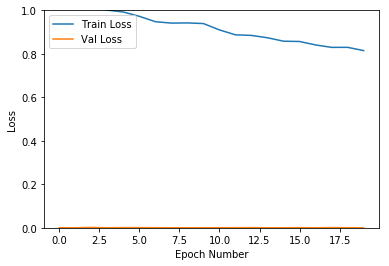

In [103]:
history = np.array(history)
plt.plot(history[:,[0,2]])
plt.legend(['Train Loss','Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

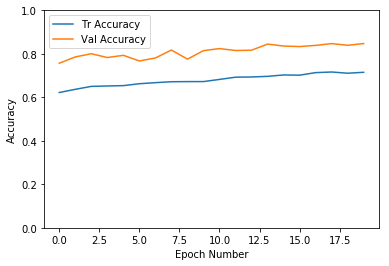

In [105]:
plt.plot(history[:,[1,3]])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

In [109]:
device=torch.device("cuda:0")

num_epochs=13
trained_model_2, history_2 = tr_val(res50.cuda(),loss_func,optimizer,num_epochs)

torch.save(history, dataset+'_history_2.pt')

Epoch: 1/13
Epoch : 000, Training: Loss: 0.8282, Accuracy: 71.1954%, 
		Validation : Loss : 0.4374, Accuracy: 85.9264%, Time: 366.8933s
Epoch: 2/13
Epoch : 001, Training: Loss: 0.8031, Accuracy: 71.8137%, 
		Validation : Loss : 0.4642, Accuracy: 85.1729%, Time: 366.2358s
Epoch: 3/13
Epoch : 002, Training: Loss: 0.8176, Accuracy: 71.6689%, 
		Validation : Loss : 0.4204, Accuracy: 85.5275%, Time: 366.2663s
Epoch: 4/13
Epoch : 003, Training: Loss: 0.7785, Accuracy: 73.6185%, 
		Validation : Loss : 0.4128, Accuracy: 86.7243%, Time: 365.8306s
Epoch: 5/13
Epoch : 004, Training: Loss: 0.7845, Accuracy: 72.7050%, 
		Validation : Loss : 0.4122, Accuracy: 87.6995%, Time: 365.7314s
Epoch: 6/13
Epoch : 005, Training: Loss: 0.7860, Accuracy: 72.5992%, 
		Validation : Loss : 0.4498, Accuracy: 85.1507%, Time: 365.7465s
Epoch: 7/13
Epoch : 006, Training: Loss: 0.8113, Accuracy: 72.1368%, 
		Validation : Loss : 0.4145, Accuracy: 86.6135%, Time: 365.8715s
Epoch: 8/13
Epoch : 007, Training: Loss: 0.8080,

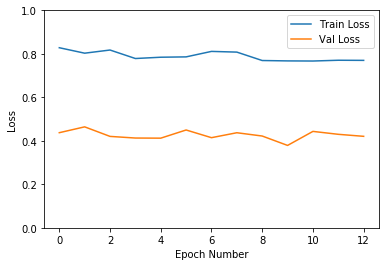

In [112]:
history_2 = np.array(history_2)
plt.plot(history_2[:,[0,2]])
plt.legend(['Train Loss','Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve_2.png')
plt.show()

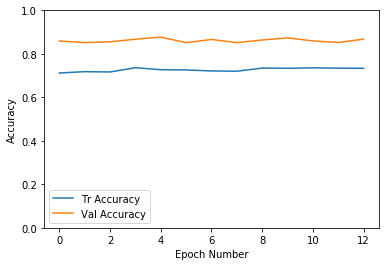

In [113]:
plt.plot(history_2[:,[1,3]])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve_2.png')
plt.show()

In [0]:
def predict(model,test_image_name):
  
  transform=image_transforms['test']
  
  test_image=Image.open(test_image_name)
  plt.imshow(test_image)
  
  test_image_tensor=transform(test_image)
  
  test_image_tensor=test_image_tensor.view(1,3,224,224).cuda()
  
  with torch.no_grad():
    model.eval()
    out=model(test_image_tensor)
    ps=torch.exp(out)
    topk, topclass=ps.topk(3,dim=1)
    for i in range(3):
       print("Predcition", i+1, ": C", topclass.cpu().numpy()[0][i], ", Score: ", topk.cpu().numpy()[0][i])

In [0]:
from sklearn.metrics import confusion_matrix

In [137]:
dirs=os.listdir('test/')
dirs

['img_84041.jpg',
 'img_11498.jpg',
 'img_40037.jpg',
 'img_80910.jpg',
 'img_59529.jpg',
 'img_12108.jpg',
 'img_86974.jpg',
 'img_60299.jpg',
 'img_101.jpg',
 'img_26387.jpg',
 'img_46785.jpg',
 'img_48124.jpg',
 'img_100259.jpg',
 'img_87807.jpg',
 'img_101281.jpg',
 'img_46817.jpg',
 'img_6877.jpg',
 'img_97568.jpg',
 'img_22580.jpg',
 'img_91036.jpg',
 'img_13135.jpg',
 'img_82467.jpg',
 'img_97108.jpg',
 'img_33287.jpg',
 'img_60496.jpg',
 'img_64619.jpg',
 'img_90836.jpg',
 'img_83349.jpg',
 'img_52984.jpg',
 'img_94511.jpg',
 'img_57956.jpg',
 'img_14176.jpg',
 'img_33877.jpg',
 'img_13808.jpg',
 'img_84102.jpg',
 'img_83034.jpg',
 'img_101446.jpg',
 'img_39150.jpg',
 'img_12115.jpg',
 'img_71687.jpg',
 'img_51209.jpg',
 'img_57970.jpg',
 'img_17987.jpg',
 'img_76197.jpg',
 'img_13670.jpg',
 'img_55513.jpg',
 'img_12004.jpg',
 'img_89303.jpg',
 'img_63116.jpg',
 'img_40751.jpg',
 'img_26648.jpg',
 'img_28207.jpg',
 'img_25002.jpg',
 'img_88129.jpg',
 'img_79560.jpg',
 'img_3781

In [0]:
from IPython.display import clear_output

Predcition 1 : C 7 , Score:  0.969352
Predcition 2 : C 8 , Score:  0.015061932
Predcition 3 : C 6 , Score:  0.009311678


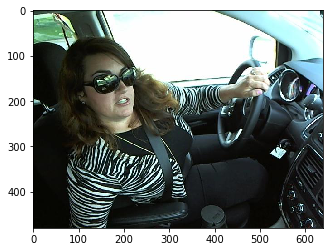

Predcition 1 : C 2 , Score:  0.4776695
Predcition 2 : C 0 , Score:  0.14557216
Predcition 3 : C 8 , Score:  0.11557972


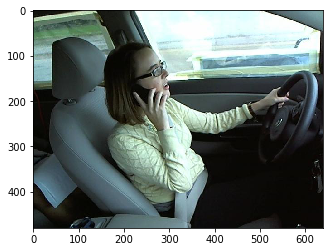

Predcition 1 : C 3 , Score:  0.49146566
Predcition 2 : C 0 , Score:  0.4089564
Predcition 3 : C 6 , Score:  0.071445346


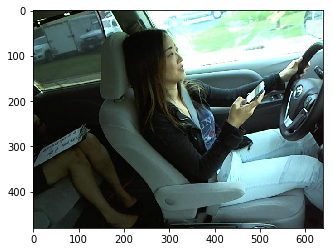

Predcition 1 : C 7 , Score:  0.66556984
Predcition 2 : C 8 , Score:  0.19762453
Predcition 3 : C 9 , Score:  0.103921354


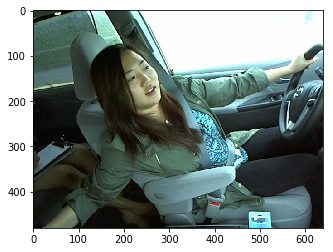

Predcition 1 : C 2 , Score:  0.7796721
Predcition 2 : C 6 , Score:  0.13723667
Predcition 3 : C 8 , Score:  0.06613269


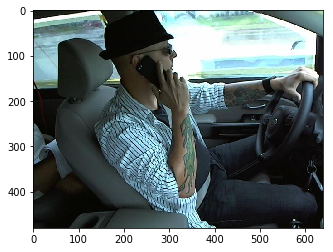

Predcition 1 : C 5 , Score:  0.66580176
Predcition 2 : C 9 , Score:  0.18026416
Predcition 3 : C 0 , Score:  0.13176873


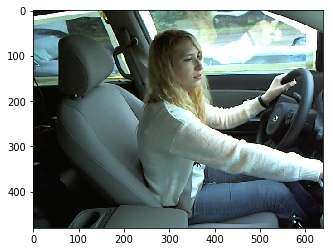

Predcition 1 : C 2 , Score:  0.61650234
Predcition 2 : C 8 , Score:  0.28343385
Predcition 3 : C 6 , Score:  0.07281412


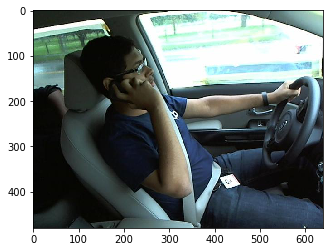

Predcition 1 : C 5 , Score:  0.44570667
Predcition 2 : C 9 , Score:  0.17387016
Predcition 3 : C 0 , Score:  0.14222248


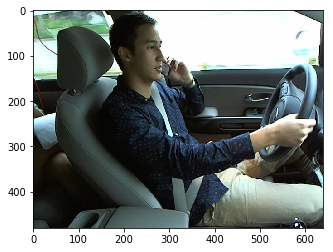

Predcition 1 : C 2 , Score:  0.89639634
Predcition 2 : C 8 , Score:  0.08383148
Predcition 3 : C 0 , Score:  0.012599113


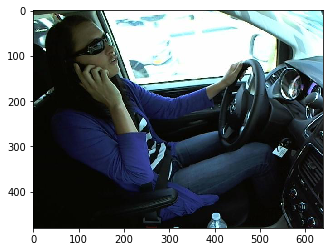

Predcition 1 : C 5 , Score:  0.8040877
Predcition 2 : C 9 , Score:  0.13284591
Predcition 3 : C 0 , Score:  0.058634024


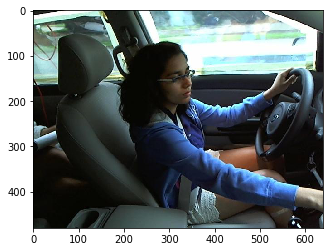

In [170]:
#testing on an image
for filename in dirs[10:20]:
  model=torch.load('driver_model_14.pt')  
  predict(model,'test/'+filename)
  plt.show()
  time.sleep(0)
  #clear_output()